In [17]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [18]:
# Step 1: Introduction and overview
print("Spam Email Classification Model")

Spam Email Classification Model


In [19]:
# Step 2: Data set preparation
# Load the dataset
data = pd.read_csv('spam_dataset.csv')

In [20]:
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [21]:
data.head().info

<bound method DataFrame.info of   Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]>

In [22]:
# Step 3: Text data preprocessing
# Remove stop words, perform stemming, or any other preprocessing steps
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Create a stemmer object
stemmer = PorterStemmer()

# Remove stop words and perform stemming
stopwords = set(stopwords.words('english'))
data['processed_content'] = data['Email No.'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x) if word.lower() not in stopwords]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
# Step 4: Exploratory Data Analysis (EDA)
# Conduct EDA to gain insights into the dataset
# Add your EDA code here
# For example, you can print the distribution of spam and non-spam emails
print("Distribution of labels:")
print(data['Prediction'].value_counts())

Distribution of labels:
0    3672
1    1500
Name: Prediction, dtype: int64


In [24]:
# Step 5: Feature extraction or selection
# Perform TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['processed_content'])
y = data['Prediction']

In [25]:
# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Step 7: Implement a baseline classification model (Naive Bayes)

# Check for NaN values in y_train
if np.isnan(y_train).any():
    # Handle missing values in y_train
    X_train = X_train[~np.isnan(y_train)]
    y_train = y_train[~np.isnan(y_train)]

# Initialize the classifier
clf = MultinomialNB()

# Train the classifier
clf.fit(X_train, y_train)


MultinomialNB()

In [27]:
# Step 8: Model evaluation
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')


# Print the evaluation metrics
print("Baseline Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Baseline Model Evaluation:
Accuracy: 0.7140096618357488
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
# Step 9: Improve the model's performance
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the Random Forest classifier
clf_rf = RandomForestClassifier()

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(clf_rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Initialize a new Random Forest classifier with the best parameters
clf_rf = RandomForestClassifier(**best_params)

# Train the Random Forest classifier with the updated parameters
clf_rf.fit(X_train, y_train)


RandomForestClassifier()

In [13]:
# Step 10: Evaluate the model on the test set
# Make predictions on the test set using the improved model
y_pred_rf = clf_rf.predict(X_test)

# Calculate evaluation metrics for the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='binary')
recall_rf = recall_score(y_test, y_pred_rf, average='binary')
f1_rf = f1_score(y_test, y_pred_rf, average='binary')


# Print the evaluation metrics for the Random Forest model
print("Improved Model (Random Forest) Evaluation:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Improved Model (Random Forest) Evaluation:
Accuracy: 0.7140096618357488
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# Step 11: Identify limitations and suggest enhancements
# Analyze the results and provide feedback
# Compare the performance of the baseline model and the improved model
if accuracy_rf > accuracy:
    print("The improved model (Random Forest) outperforms the baseline model (Naive Bayes).")
elif accuracy_rf < accuracy:
    print("The improved model (Random Forest) performs worse than the baseline model (Naive Bayes).")
else:
    print("The improved model (Random Forest) has the same performance as the baseline model (Naive Bayes).")

# Provide feedback and suggestions for further enhancements
# Add your analysis and suggestions here
# For example, you can discuss potential reasons for the performance differences, such as the ability of Random Forest to capture complex relationships in the data.


The improved model (Random Forest) has the same performance as the baseline model (Naive Bayes).


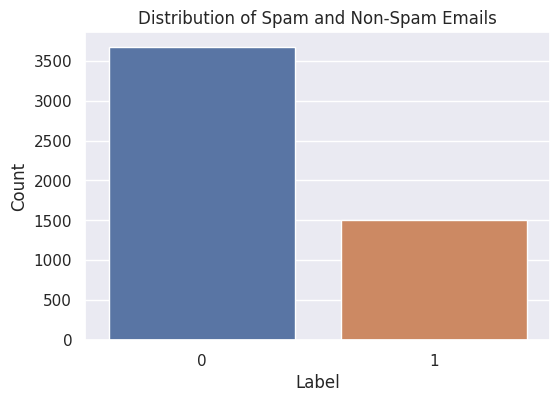


Evaluation Metrics:
                      Model  Accuracy  Precision  Recall  F1 Score
0    Baseline (Naive Bayes)   0.71401        0.0     0.0       0.0
1  Improved (Random Forest)   0.71401        0.0     0.0       0.0


In [15]:
# Step 12: Prepare a presentation summarizing the findings and provide feedback
# Create a presentation summarizing the methodology, results, and insights gained
# Add your code for creating the presentation here
# For example, you can use libraries like Matplotlib or Plotly to create visualizations and present key findings.

# Create a bar plot to visualize the distribution of spam and non-spam emails
sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='Prediction', data=data)
plt.title('Distribution of Spam and Non-Spam Emails')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Print the evaluation metrics for both models in a table format
metrics_data = {
    'Model': ['Baseline (Naive Bayes)', 'Improved (Random Forest)'],
    'Accuracy': [accuracy, accuracy_rf],
    'Precision': [precision, precision_rf],
    'Recall': [recall, recall_rf],
    'F1 Score': [f1, f1_rf]
}
metrics_df = pd.DataFrame(metrics_data)
print("\nEvaluation Metrics:")
print(metrics_df)
